In [ ]:
from scipy.integrate import solve_ivp

Výsledky:
x = 0.0, y1 = 1.0, y2 = 0.0
x = 0.1, y1 = 1.0, y2 = -0.1
x = 0.2, y1 = 0.99, y2 = -0.2
x = 0.30000000000000004, y1 = 0.97, y2 = -0.29900000000000004
x = 0.4, y1 = 0.9400999999999999, y2 = -0.396
x = 0.5, y1 = 0.9005, y2 = -0.49001
x = 0.6000000000000001, y1 = 0.8514989999999999, y2 = -0.58006
x = 0.7000000000000001, y1 = 0.7934929999999999, y2 = -0.6652099
x = 0.8, y1 = 0.7269720099999999, y2 = -0.7445592
x = 0.9, y1 = 0.6525160899999999, y2 = -0.817256401
x = 1.0, y1 = 0.5707904498999999, y2 = -0.8825080099999999
x = 1.1, y1 = 0.4825396488999999, y2 = -0.93958705499
x = 1.2000000000000002, y1 = 0.3885809434009998, y2 = -0.98784101988
x = 1.3, y1 = 0.28979684141299994, y2 = -1.0266991142200999
x = 1.4000000000000001, y1 = 0.18712692999098984, y2 = -1.0556787983613998
x = 1.5, y1 = 0.08155905015485, y2 = -1.0743914913604988
x = 1.6, y1 = -0.025880098981199973, y2 = -1.0825473963759837
x = 1.7000000000000002, y1 = -0.13413483861879844, y2 = -1.0799593864778638
x = 1.8, y1 = -0.

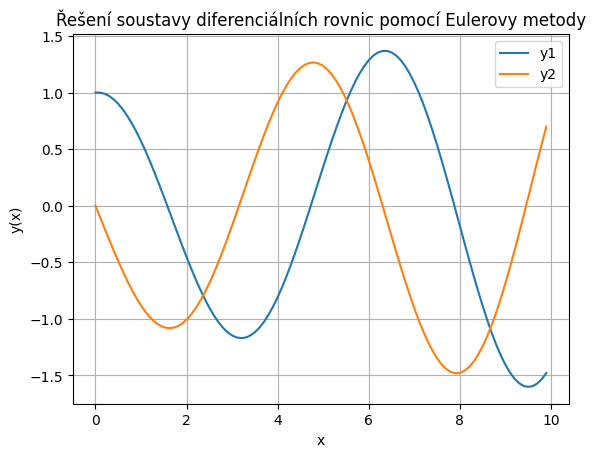

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def odeEuler(f, y0, x):
    """
    Eulerova numerická metoda pro řešení soustavy diferenciálních rovnic y' = f(y, x).
    
    Parametry:
        f: Funkce, která popisuje soustavu diferenciálních rovnic.
           Měla by přijímat vektor y a skalární x a vracet vektor hodnot.
        y0: Počáteční hodnota vektoru y pro x = x0.
        x: Pole hodnot x, pro které se hledá řešení.
        
    Návratová hodnota:
        Pole hodnot y, které odpovídá zadaným hodnotám x.
    """
    n = len(y0)                      # Počet diferenciálních rovnic
    y = np.zeros((len(x), n))        # Inicializace pole pro výsledky
    y[0] = y0                        # Nastavení počáteční hodnoty y
    for i in range(len(x) - 1):
        y[i + 1] = y[i] + f(y[i], x[i]) * (x[i + 1] - x[i])   # Eulerova aproximace
    return y

# Definice počátečních podmínek a intervalu x
x0 = 0
y0 = np.array([1, 0])                # Počáteční hodnoty pro y1 a y2
xmax = 10
dx = 0.1

x = np.arange(x0, xmax, dx)          # Pole hodnot x

# Definice soustavy diferenciálních rovnic jako lambda funkce
def f(y, x):
    """
    Funkce popisující soustavu diferenciálních rovnic y' = f(y, x).
    V tomto případě je to soustava y' = [y2, -y1].
    """
    return np.array([y[1], -y[0]])

# Volání Eulerovy metody pro řešení soustavy diferenciálních rovnic
y = odeEuler(f, y0, x)

# Výpis výsledků
print("Výsledky:")
for i, xi in enumerate(x):
    print(f"x = {xi}, y1 = {y[i, 0]}, y2 = {y[i, 1]}")

# Vykreslení grafu
plt.plot(x, y[:, 0], label='y1')
plt.plot(x, y[:, 1], label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Řešení soustavy diferenciálních rovnic pomocí Eulerovy metody')
plt.legend()
plt.grid(True)
plt.show()


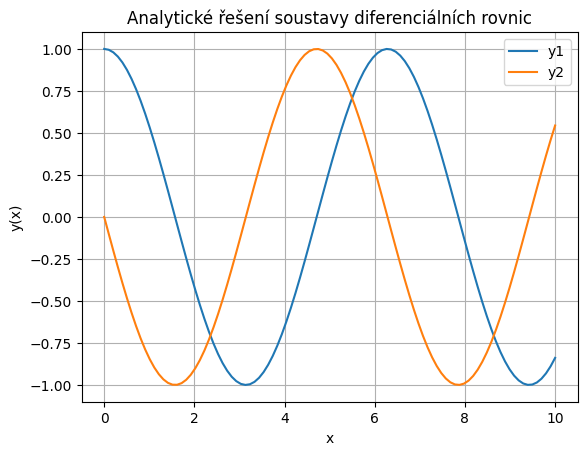

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Počáteční podmínky
A = 1
B = 0

# Analytické řešení
def y1_analytic(x):
    return A * np.cos(x) + B * np.sin(x)

def y2_analytic(x):
    return -A * np.sin(x) + B * np.cos(x)

# Definice intervalu x
x = np.linspace(0, 10, 100)  # změna pro hladký graf

# Vykreslení grafu
plt.plot(x, y1_analytic(x), label='y1')
plt.plot(x, y2_analytic(x), label='y2')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Analytické řešení soustavy diferenciálních rovnic')
plt.legend()
plt.grid(True)
plt.show()


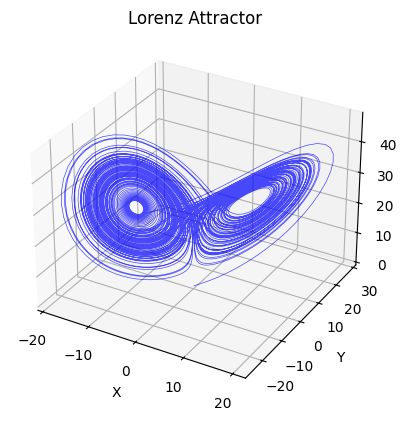

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_attractor(x, y, z, alpha, rho, beta):
    dx_dt = alpha * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return dx_dt, dy_dt, dz_dt

def rk4_step(x, y, z, alpha, rho, beta, dt):
    k1_x, k1_y, k1_z = lorenz_attractor(x, y, z, alpha, rho, beta)
    k2_x, k2_y, k2_z = lorenz_attractor(x + 0.5 * k1_x * dt, 
                                         y + 0.5 * k1_y * dt, 
                                         z + 0.5 * k1_z * dt, 
                                         alpha, rho, beta)
    k3_x, k3_y, k3_z = lorenz_attractor(x + 0.5 * k2_x * dt, 
                                         y + 0.5 * k2_y * dt, 
                                         z + 0.5 * k2_z * dt, 
                                         alpha, rho, beta)
    k4_x, k4_y, k4_z = lorenz_attractor(x + k3_x * dt, 
                                         y + k3_y * dt, 
                                         z + k3_z * dt, 
                                         alpha, rho, beta)
    x_new = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x) * dt
    y_new = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y) * dt
    z_new = z + (1/6) * (k1_z + 2*k2_z + 2*k3_z + k4_z) * dt
    return x_new, y_new, z_new

def solve_lorenz_attractor(alpha, rho, beta, dt, num_steps):
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    z = np.zeros(num_steps)
    x[0], y[0], z[0] = 0.1, 0.0, 0.0  # initial conditions

    for i in range(1, num_steps):
        x[i], y[i], z[i] = rk4_step(x[i-1], y[i-1], z[i-1], alpha, rho, beta, dt)

    return x, y, z

def plot_lorenz_attractor(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, color='b', alpha=0.7, linewidth=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Lorenz Attractor')
    plt.show()

if __name__ == "__main__":
    alpha = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    dt = 0.01
    num_steps = 10000

    x, y, z = solve_lorenz_attractor(alpha, rho, beta, dt, num_steps)
    plot_lorenz_attractor(x, y, z)


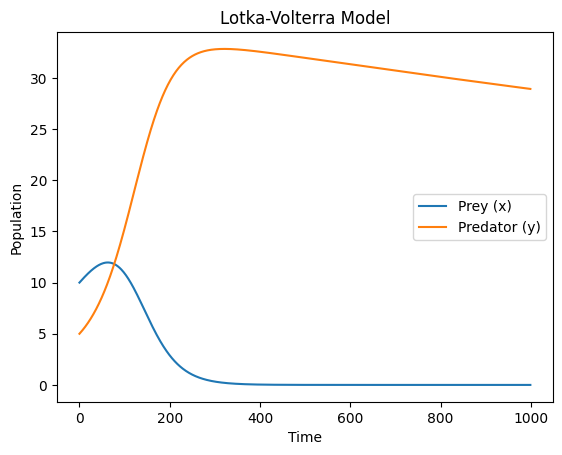

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra(x, y, alpha, beta, delta, gamma):
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    return dx_dt, dy_dt

def rk4_step(x, y, alpha, beta, delta, gamma, dt):
    k1_x, k1_y = lotka_volterra(x, y, alpha, beta, delta, gamma)
    k2_x, k2_y = lotka_volterra(x + 0.5 * k1_x * dt, 
                                y + 0.5 * k1_y * dt, 
                                alpha, beta, delta, gamma)
    k3_x, k3_y = lotka_volterra(x + 0.5 * k2_x * dt, 
                                y + 0.5 * k2_y * dt, 
                                alpha, beta, delta, gamma)
    k4_x, k4_y = lotka_volterra(x + k3_x * dt, 
                                y + k3_y * dt, 
                                alpha, beta, delta, gamma)
    x_new = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x) * dt
    y_new = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y) * dt
    return x_new, y_new

def solve_lotka_volterra(alpha, beta, delta, gamma, dt, num_steps):
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    x[0], y[0] = 10, 5  # initial conditions

    for i in range(1, num_steps):
        x[i], y[i] = rk4_step(x[i-1], y[i-1], alpha, beta, delta, gamma, dt)

    return x, y

def plot_lotka_volterra(x, y):
    plt.plot(x, label='Prey (x)')
    plt.plot(y, label='Predator (y)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Lotka-Volterra Model')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    alpha = 1.0
    beta = 0.1
    delta = 0.1
    gamma = 0.02
    dt = 0.01
    num_steps = 1000

    x, y = solve_lotka_volterra(alpha, beta, delta, gamma, dt, num_steps)
    plot_lotka_volterra(x, y)


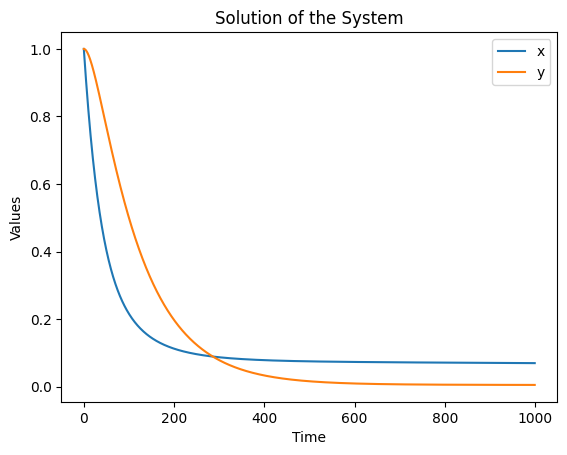

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def system(x, y):
    dx_dt = -2 * x * y
    dy_dt = x**2 - y
    return dx_dt, dy_dt

def rk4_step(x, y, dt):
    k1_x, k1_y = system(x, y)
    k2_x, k2_y = system(x + 0.5 * k1_x * dt, 
                        y + 0.5 * k1_y * dt)
    k3_x, k3_y = system(x + 0.5 * k2_x * dt, 
                        y + 0.5 * k2_y * dt)
    k4_x, k4_y = system(x + k3_x * dt, 
                        y + k3_y * dt)
    x_new = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x) * dt
    y_new = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y) * dt
    return x_new, y_new

def solve_system(dt, num_steps):
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    x[0], y[0] = 1, 1  # initial conditions

    for i in range(1, num_steps):
        x[i], y[i] = rk4_step(x[i-1], y[i-1], dt)

    return x, y

def plot_solution(x, y):
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title('Solution of the System')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    dt = 0.01
    num_steps = 1000

    x, y = solve_system(dt, num_steps)
    plot_solution(x, y)


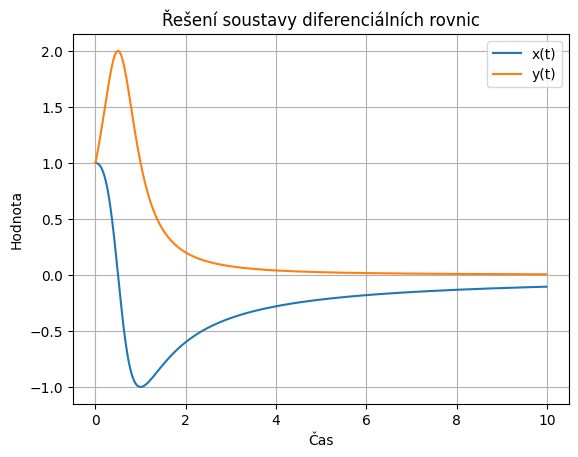

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def dx_dt(x, y):
    return x**2 - y**2

def dy_dt(x, y):
    return 2 * x * y

def rk4_step(x, y, dt):
    k1_x = dx_dt(x, y)
    k1_y = dy_dt(x, y)
    
    k2_x = dx_dt(x + 0.5 * k1_x * dt, y + 0.5 * k1_y * dt)
    k2_y = dy_dt(x + 0.5 * k1_x * dt, y + 0.5 * k1_y * dt)
    
    k3_x = dx_dt(x + 0.5 * k2_x * dt, y + 0.5 * k2_y * dt)
    k3_y = dy_dt(x + 0.5 * k2_x * dt, y + 0.5 * k2_y * dt)
    
    k4_x = dx_dt(x + k3_x * dt, y + k3_y * dt)
    k4_y = dy_dt(x + k3_x * dt, y + k3_y * dt)
    
    x_new = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x) * dt
    y_new = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y) * dt
    
    return x_new, y_new

def solve_system(x0, y0, dt, num_steps):
    x = np.zeros(num_steps)
    y = np.zeros(num_steps)
    x[0], y[0] = x0, y0  # Počáteční podmínky

    for i in range(1, num_steps):
        x[i], y[i] = rk4_step(x[i-1], y[i-1], dt)
        
    return x, y

def plot_solution(x, y, dt, num_steps):
    t = np.arange(0, dt*num_steps, dt)
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.xlabel('Čas')
    plt.ylabel('Hodnota')
    plt.title('Řešení soustavy diferenciálních rovnic')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    x0, y0 = 1, 1  # Počáteční hodnoty
    dt = 0.01  # Velikost časového kroku
    num_steps = 1000  # Počet kroků

    x, y = solve_system(x0, y0, dt, num_steps)
    plot_solution(x, y, dt, num_steps)
